# Bank Authentication


We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

## Getting the Data

**Using pandas to read in the bank_note_data.csv file**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank_note_data.csv')

In [3]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Train Test Split

**Creating two objects x and y which are the scaled feature values and labels respectively.**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x=df.drop('Class',axis=1)
y=df['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)


## Standard Scaling



In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

## Creating the model

In [7]:
from tensorflow.keras.models import Sequential

In [8]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout

In [9]:

model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(8,activation='relu'))
#Binary classification thats why activation is sigmoid because 0 AND 1
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')


In [10]:
model.fit(x=xtrain,y=ytrain, epochs=100)

Epoch 1/100
29/29 [==============================] - 5s 16ms/step - loss: 0.6564
Epoch 2/100
29/29 [==============================] - 0s 9ms/step - loss: 0.6321
Epoch 3/100
29/29 [==============================] - 0s 10ms/step - loss: 0.6027
Epoch 4/100
29/29 [==============================] - 0s 11ms/step - loss: 0.5675
Epoch 5/100
29/29 [==============================] - 0s 11ms/step - loss: 0.5264
Epoch 6/100
29/29 [==============================] - 0s 11ms/step - loss: 0.4823
Epoch 7/100
29/29 [==============================] - 0s 13ms/step - loss: 0.4367
Epoch 8/100
29/29 [==============================] - 0s 13ms/step - loss: 0.3923
Epoch 9/100
29/29 [==============================] - 0s 11ms/step - loss: 0.3499
Epoch 10/100
29/29 [==============================] - 0s 11ms/step - loss: 0.3117
Epoch 11/100
29/29 [==============================] - 0s 13ms/step - loss: 0.2768
Epoch 12/100
29/29 [==============================] - 0s 12ms/step - loss: 0.2460
Epoch 13/100
29/29 [======

In [11]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

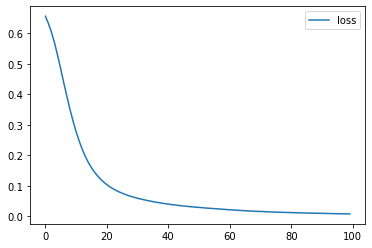

In [12]:

model_loss.plot()

## Model Evaluation

In [13]:
pred=(model.predict(xtest) > 0.5).astype("int32")

15/15 [==============================] - 0s 6ms/step


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
pred=(model.predict(xtest) > 0.5).astype("int32")

15/15 [==============================] - 0s 4ms/step


In [16]:
print(confusion_matrix(ytest,pred))
print('\n')
print(classification_report(ytest,pred))

[[257   0]
 [  0 196]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       196

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453

